# Graphs Used in the Shared Task Challenge Paper

Authors: Hadi Asghari & Freya Hewett
Date: July 2022



In [70]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [71]:
# Load Training Data
score = []
sentence = []
with open("data_training.csv", 'r', encoding='ISO-8859-1') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        if i == 0:
            print(row)
            continue # skip header
        sentence.append(row[1])
        score.append(float(row[2]))  # 5 on detailed dataset
        
score = np.array(score)
assert len(score) == len(sentence)  # sanity

['idx', 'sentence', 'label']


score range: 1.0 6.333333333
basic baseline: 3.015705657663 1.1802792931882462


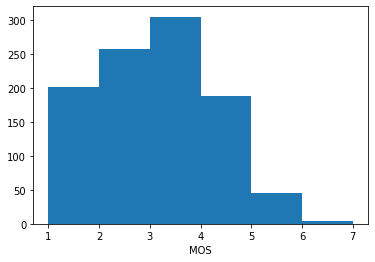

In [77]:
# Range & Histogram
print("score range:", score.min(), score.max())
print("basic baseline:", score.mean(), score.std())

fig, ax = plt.subplots(1, 1)
ax.hist(score, bins=[1,2,3,4,5,6,7])
ax.set_xlabel("MOS")
fig.savefig("fig_hist.pdf")

In [35]:
# Baseline RMSE

def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true)))
    
baseline = np.ones(len(score)) * score.mean()

print(root_mean_squared_error(score, baseline))

1.1802792931882462


R: (0.8493523220744107, 1.232087997985623e-59) 

DIFF X-F: ID
2124   -1.628149
2187   -1.565224
2070   -1.411102
dtype: float64 
 ID
2053    0.729828
2112    0.777076
2075    1.062819
dtype: float64
avg diff: -0.2548087053406571 19


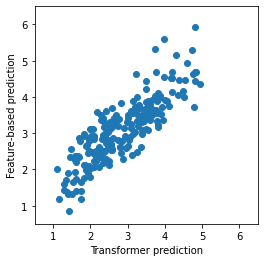

In [86]:
# Compare predictions of transformer-vs-feature models!

# load & merge
d_x = pd.read_csv("answer-xlmr.csv", index_col="ID")
d_f = pd.read_csv("answer-feat.csv", index_col="ID")
ds = d_x.join(d_f, lsuffix="_x", rsuffix="_f")
#print(d_x.head(1)['MOS'], d_f.head(1)['MOS'], ds.head(1), "\n")

# plot
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(ds.MOS_x, ds.MOS_f)
ax.set_xlim(0.5, 6.5)
ax.set_xlabel("Transformer prediction")
ax.set_ylim(0.5, 6.5)
ax.set_ylabel("Feature-based prediction")
fig.savefig("fig_results_scatter.pdf")
print("R:", stats.pearsonr(ds.MOS_x, ds.MOS_f), "\n")  # 0.85 concordance

# differences
t = ds['MOS_x'] - ds['MOS_f']
t = t.sort_values()
print("DIFF X-F:", t.head(3), "\n", t.tail(3))  # so both negative and positive
print("avg diff:", t.mean(), sum(abs(t)>1))

In [68]:
t<1

ID
2124     True
2187     True
2070     True
2115     True
2031     True
        ...  
2017     True
2087     True
2053     True
2112     True
2075    False
Length: 210, dtype: bool